In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("./winequality-red (1).csv", sep=';')
data = data.drop(columns='quality', axis=1)

In [ ]:
#dropping quality column because it's the outplut column
X = data.iloc[:,:-1].values

In [60]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [61]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711]])

In [62]:
data.shape

(1599, 11)

### PCA

In [63]:
from sklearn.decomposition import PCA

explained_variance = []
for i in range(data.shape[1]):
    pca= PCA(n_components=i)
    pca.fit_transform(data)

In [64]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483])

In [66]:
variance = np.cumsum(pca.explained_variance_ratio_)
variance

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561])

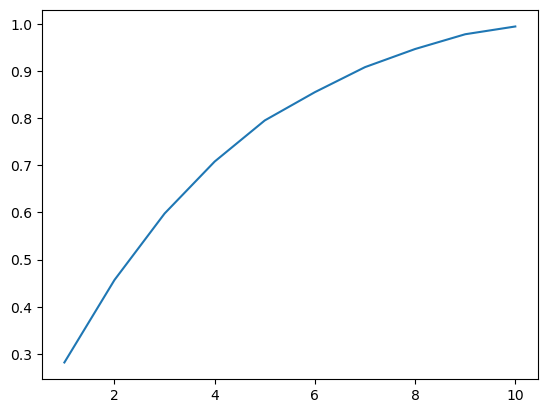

In [67]:
plt.plot(range(1,11), variance)
plt.title('number of Principal components vs. Explained variance');

90% of the variance in data is explained by 8 features, so optimum number of features for PCA is 9

### APPLYING PCA with n_components=9

In [100]:
pca = PCA(n_components=9)
data_trf = pca.fit_transform(data)

In [101]:
#converting pca array to df
pca_df = pd.DataFrame(data_trf)

In [102]:
pca_df

#data after pca transformation

,0,1,2,3,4,5,6,7,8
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098
...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248


K-MEANS

In [103]:
from sklearn.cluster import KMeans

In [107]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data_trf)
    wcss.append(km.inertia_)

In [108]:
wcss

[17203.81452589483,
 13945.70083209723,
 12245.682226733315,
 10910.955624026752,
 9771.942790928195,
 8984.080925422279,
 8270.99678801886,
 7926.629040346143,
 7600.075399081963,
 7351.987395821619]

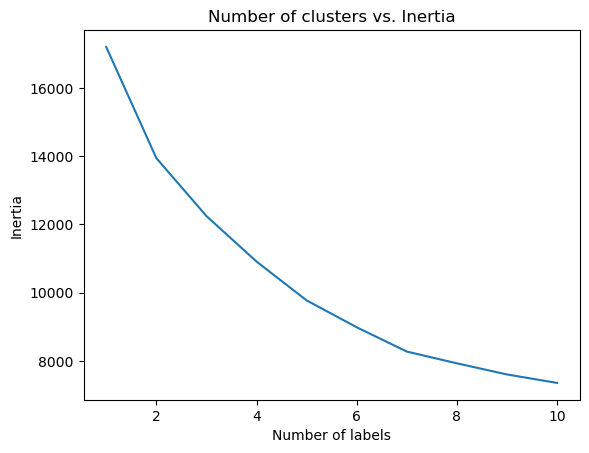

In [112]:
plt.plot(range(1,11), wcss)
plt.title('Number of clusters vs. Inertia')
plt.xlabel('Number of labels')
plt.ylabel('Inertia');

10 clusters seems to be the best possible value for this data
* if we increase the number of clusters, we might get a better inertia value, but then increasing the number of clusters more than 10 will be tedious and hard to interprete.

### USING PCA to reduce data into 2-D so that we can visualise it.

In [95]:
pca_3 = PCA(n_components=2)
x = pca_3.fit_transform(data)

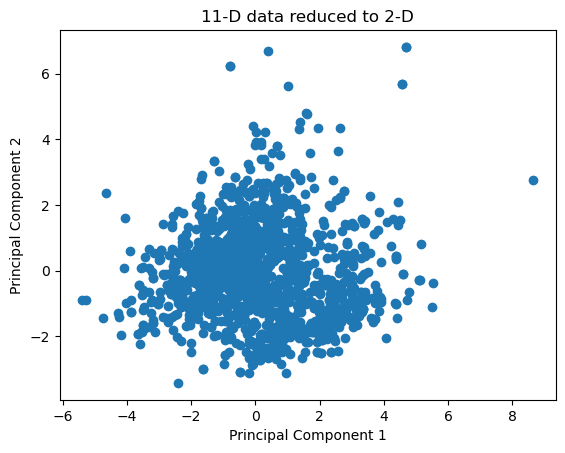

In [111]:
plt.scatter(x[:,0], x[:,1])
plt.title('11-D data reduced to 2-D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');